In [1]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class

In [10]:
########################
# Combined Element Data
########################

Na_22_E = np.array([0.511, 1.2745]) # Given
Na_22_chan = np.array([857.3752558261165, 1836.76604095419])
Na_22_unc = np.array([5.57125064e-01, 4.90022375e-01])

Mn_54_E = np.array([0.835]) # Given
Mn_54_chan = np.array([1301.2755181195362])
Mn_54_unc = np.array([1.46941527e+01])

Co_60_E = np.array([1.175, 1.333]) # Given
Co_60_chan = np.array([1731.6001283456444, 1919.9092316093695])
Co_60_unc = np.array([2.29241806e+00, 2.40838343e-01])

Co_57_E = np.array([0.088]) # Given
Co_57_chan = np.array([231.13450500906077])
Co_57_unc = np.array([4.16536660e-02])

Cd_109_E = np.array([0.122]) # Given
Cd_109_chan = np.array([165.63024596656805])
Cd_109_unc = np.array([2.15440268e-01])

Ba_133_E = np.array([0.081, 0.276, 0.303, 0.356, 0.384]) # Given
Ba_133_chan = np.array([297.6006628324705, 506.9831389809982, 530.3850014121278, 620.8060465800778, 679.4661772583805])
Ba_133_unc = np.array([0.6032397360614885**2, 1.41633987256634**2, 0.44804060611900703**2, 0.18720446476158387**2, 1.0081419263860742**2])


#############
# Linear Fit
#############

x_range = np.concatenate((Na_22_E, Mn_54_E, Co_57_E, Co_60_E, Cd_109_E, Ba_133_E))
y_range = np.concatenate((Na_22_chan, Mn_54_chan, Co_57_chan, Co_60_chan, Cd_109_chan, Ba_133_chan))

def linFit(x, m, b):
    fit = m*x + b
    return fit


popt, pcov = curve_fit(linFit, x_range, y_range, p0=[m:=100, b:=400]) # solves for a, mean, sigma, h
y_fit = linFit(x_range, *popt) # creates y(x) = gaus function with fitted values

print("Linear Fit Slope: ", popt[0],
      "\n Linear Fit y-int: ", popt[1])

print("\n Linear Fit Uncertainty: \n", pcov)

Linear Fit Slope:  1363.4934001745587 
 Linear Fit y-int:  124.2526398632972

 Linear Fit Uncertainty: 
 [[1026.15598307 -576.22933476]
 [-576.22933476  531.17048974]]


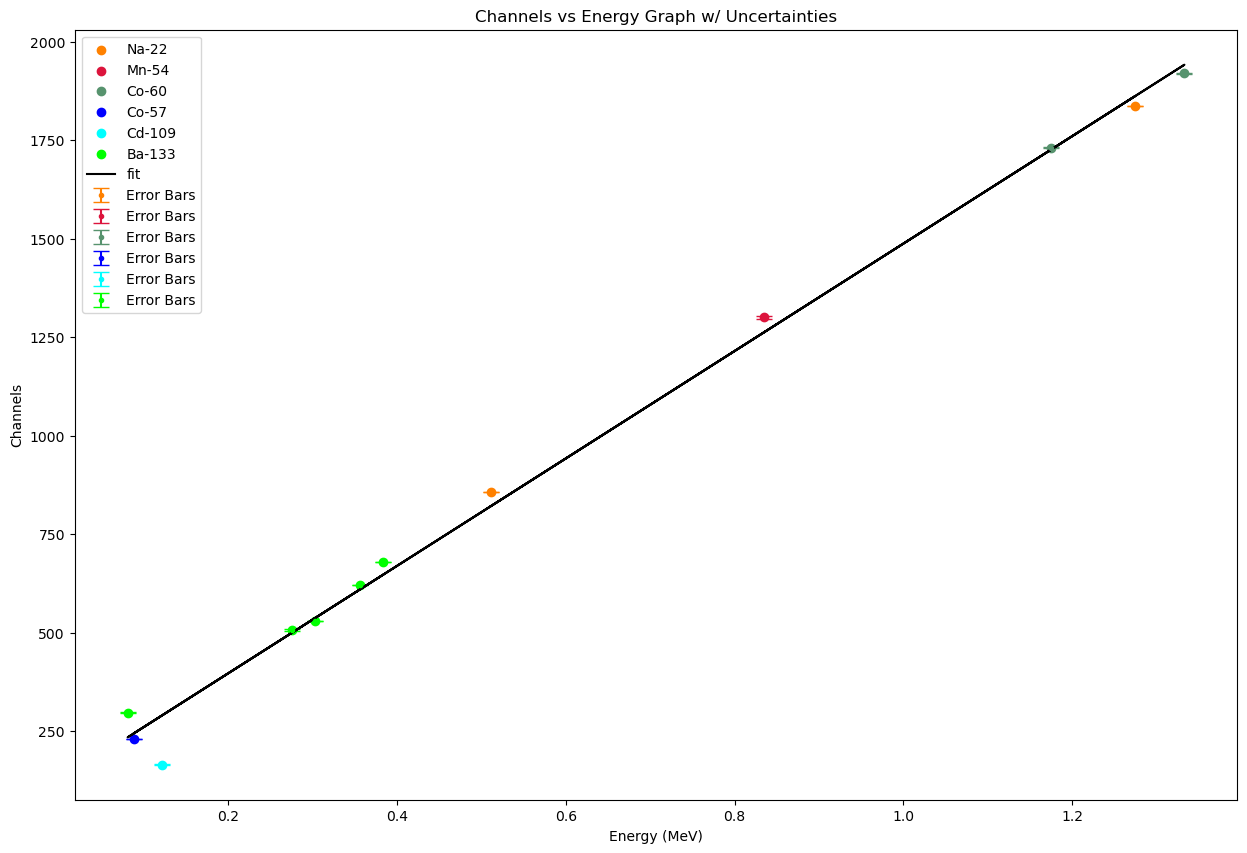

In [11]:
#########
# Plot
#########

def Scatter(energy, channels, c, l):
    plt.scatter(energy, 
                channels,
                c=c,
                label=l)

def errorBars(energy, channels, uncertainties, c):
    plt.errorbar(energy, 
                 channels, 
                 yerr=np.sqrt(uncertainties),
                 fmt='.',
                 c=c,
                 capsize=6,
                 label='Error Bars')
    

plt.figure(figsize=(15,10)) # Make figure bigger

Scatter(Na_22_E, Na_22_chan, '#FF8100', 'Na-22')
errorBars(Na_22_E, Na_22_chan, Na_22_unc, '#FF8100')

Scatter(Mn_54_E, Mn_54_chan, '#DC143C', 'Mn-54')
errorBars(Mn_54_E, Mn_54_chan, Mn_54_unc, '#DC143C')

Scatter(Co_60_E, Co_60_chan, '#57936E', 'Co-60')
errorBars(Co_60_E, Co_60_chan, Co_60_unc, '#57936E')

Scatter(Co_57_E, Co_57_chan, '#0000FF', 'Co-57')
errorBars(Co_57_E, Co_57_chan, Co_57_unc, '#0000FF')

Scatter(Cd_109_E, Cd_109_chan, '#00FFFF', 'Cd-109')
errorBars(Cd_109_E, Cd_109_chan, Cd_109_unc, '#00FFFF')

Scatter(Ba_133_E, Ba_133_chan, '#00FF00', 'Ba-133')
errorBars(Ba_133_E, Ba_133_chan, Ba_133_unc, '#00FF00')

plt.plot(x_range, y_fit, color='#000000', label='fit')
plt.xlabel('Energy (MeV)') # Label for x-axis
plt.ylabel('Channels') # Label for y-axis
plt.title('Channels vs Energy Graph w/ Uncertainties')
plt.legend() # create legend
plt.show() # show plot

In [12]:
#####################
# Element X Analysis
#####################

def energyUncertainty(channel, channel_unc, m, b, m_unc, b_unc):
    energy = (channel-b)/m
    e_unc_sqaured = (channel_unc * 1/m)**2 + (m_unc * (channel-b)/(m**2))**2 + (b_unc * 1/m)**2
    return energy, np.sqrt(e_unc_sqaured)


e1, e1_unc = energyUncertainty(1055.315423795154, np.sqrt(1.44094013e+00), popt[0], popt[1], np.sqrt(24861.20647965), np.sqrt(13705.57685165))
e2, e2_unc = energyUncertainty(1636.6224667069846, np.sqrt(6.20368099e+00), popt[0], popt[1], np.sqrt(24861.20647965), np.sqrt(13705.57685165))

print(f"Channel 1055: Energy = {e1}, Energy Uncertainty = {e1_unc},\n Channel 1637: Energy = {e2}, Energy Uncertainty = {e2_unc}")

Channel 1055: Energy = 0.6828509648911093, Energy Uncertainty = 0.11665473812732893,
 Channel 1637: Energy = 1.1091874934268615, Energy Uncertainty = 0.15436228686691897
